# **Employee Attrition Prediction Using Supervised and Unsupervised ML Techniques**

## **Load and Explore Data**

In [1]:
import pandas as pd

emp_att_df = pd.read_csv("Employee_Attrition_train.csv")

print(emp_att_df.columns.tolist())

['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Number of Promotions', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure', 'Company Reputation', 'Employee Recognition', 'Attrition']


In [2]:
# Correct column names
# Clean column names: convert to lowercase and replace spaces with underscores
emp_att_df.columns = emp_att_df.columns.str.lower().str.replace(' ', '_')

# Display cleaned column names
print("Cleaned columns:")
print(emp_att_df.columns.tolist())
print()

# Display first few rows to verify
print("First few rows:")
emp_att_df.describe()

Cleaned columns:
['employee_id', 'age', 'gender', 'years_at_company', 'job_role', 'monthly_income', 'work-life_balance', 'job_satisfaction', 'number_of_promotions', 'distance_from_home', 'education_level', 'marital_status', 'number_of_dependents', 'job_level', 'company_size', 'company_tenure', 'company_reputation', 'employee_recognition', 'attrition']

First few rows:


,employee_id,age,years_at_company,monthly_income,number_of_promotions,distance_from_home,number_of_dependents,company_tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


## **Identify Variable Types**

In [3]:
# Identify numerical and categorical variables
numerical_vars = emp_att_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = emp_att_df.select_dtypes(include=['object']).columns.tolist()

# Remove target variable from the lists if present
if 'attrition' in numerical_vars:
    numerical_vars.remove('attrition')
if 'attrition' in categorical_vars:
    categorical_vars.remove('attrition')

print("VARIABLE TYPE IDENTIFICATION")
print(f"\nTotal Variables: {len(numerical_vars) + len(categorical_vars)}")
print(f"Numerical Variables: {len(numerical_vars)}")
print(f"Categorical Variables: {len(categorical_vars)}")

print("\n")
print("NUMERICAL VARIABLES:")
for i, var in enumerate(numerical_vars, 1):
    print(f"{i:2d}. {var}")

print("\n")
print("CATEGORICAL VARIABLES:")
for i, var in enumerate(categorical_vars, 1):
    print(f"{i:2d}. {var}")

print("\n")
print("CATEGORICAL VARIABLE DETAILS:")
for var in categorical_vars:
    unique_values = emp_att_df[var].unique()
    print(f"\n{var}:")
    print(f"  Unique values ({len(unique_values)}): {unique_values}")

VARIABLE TYPE IDENTIFICATION

Total Variables: 18
Numerical Variables: 8
Categorical Variables: 10


NUMERICAL VARIABLES:
 1. employee_id
 2. age
 3. years_at_company
 4. monthly_income
 5. number_of_promotions
 6. distance_from_home
 7. number_of_dependents
 8. company_tenure


CATEGORICAL VARIABLES:
 1. gender
 2. job_role
 3. work-life_balance
 4. job_satisfaction
 5. education_level
 6. marital_status
 7. job_level
 8. company_size
 9. company_reputation
10. employee_recognition


CATEGORICAL VARIABLE DETAILS:

gender:
  Unique values (2): ['Male' 'Female']

job_role:
  Unique values (5): ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

work-life_balance:
  Unique values (4): ['Excellent' 'Poor' 'Good' 'Fair']

job_satisfaction:
  Unique values (4): ['Medium' 'High' 'Very High' 'Low']

education_level:
  Unique values (5): ['Associate Degree' 'Master’s Degree' 'Bachelor’s Degree' 'High School'
 'PhD']

marital_status:
  Unique values (3): ['Married' 'Divorced' 'Single']



## **Analyze Distributions**

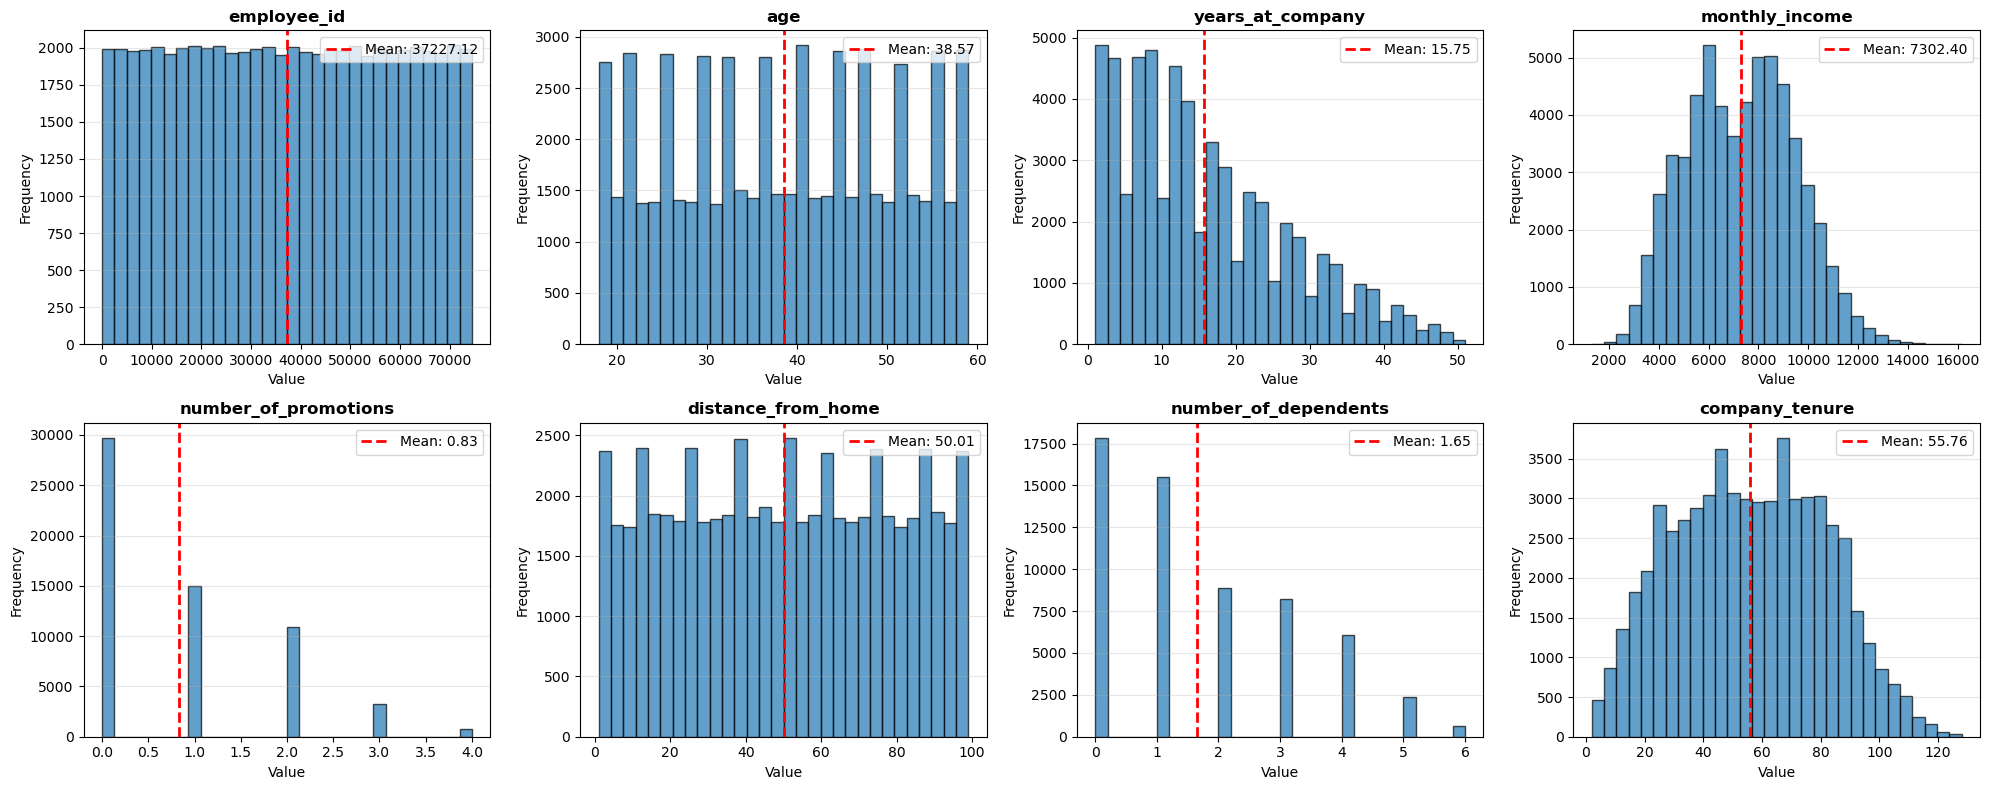

Skewness Analysis
employee_id                   :    0.00
age                           :   -0.01
years_at_company              :    0.79
monthly_income                :    0.12
number_of_promotions          :    0.99
distance_from_home            :    0.00
number_of_dependents          :    0.72
company_tenure                :    0.07


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Remove identifiers and constants for distribution analysis
analysis_cols = [col for col in numerical_vars 
                 if col not in ['employee_number', 'employee_count', 'standard_hours']]

# Create histograms for all numerical variables
n_cols = 4
n_rows = int(np.ceil(len(analysis_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(analysis_cols):
    axes[idx].hist(emp_att_df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)
    
    mean_val = emp_att_df[col].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                      label=f'Mean: {mean_val:.2f}')
    axes[idx].legend()

# Hide empty subplots
for idx in range(len(analysis_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Calculate skewness
print("Skewness Analysis")
for col in analysis_cols:
    skewness = emp_att_df[col].skew()
    print(f"{col:30s}: {skewness:7.2f}")

Dataset Overview

- 59,598 employee records

- 1 target variable


- 8 numerical variables


- 10 categorical variables
    - 7 ordinal
    - 3 nominal

- Target variable: attrition

Distribution Patterns

- Symmetric (5 variables): employee_id, age, monthly_income, distance_from_home, company_tenure show near-normal distributions (skewness: -0.5 to 0.5)

- Moderately Skewed (2 variables): years_at_company (0.79) and number_of_dependents (0.72) show moderate right skewness, indicating most employees have fewer years at company and fewer dependents

- Highly Skewed (1 variable): number_of_promotions (0.99) shows substantial right skewness, indicating most employees have received 0-1 promotions

Key Findings

- Workforce Profile: Mature workforce (mean age: 38.6) with substantial experience (mean: 15.8 years at company)

- Compensation: Average monthly income of $7,302 with relatively symmetric distribution

- Career Progression: Most employees have 0-1 promotions, with promotion opportunities appearing limited

- Geography: Distance from home is evenly distributed (mean: 50km, symmetric around this value)

## **Pre-processing Data**

In [5]:
# Drop identifier column if it exists
cols_to_drop = ['employee_id']
cols_to_drop = [col for col in cols_to_drop if col in emp_att_df.columns]

if cols_to_drop:
    emp_att_df = emp_att_df.drop(cols_to_drop, axis=1)
    print(f"Dropped columns: {cols_to_drop}")
else:
    print("No identifier columns to drop")

print(f"Shape after dropping: {emp_att_df.shape}")

Dropped columns: ['employee_id']
Shape after dropping: (59598, 18)


### Ordinal Variables

In [6]:
# FIX: Replace right single quotation mark (Unicode 8217) with straight apostrophe
if 'education_level' in emp_att_df.columns:
    print("Fixing education_level encoding...")
    # Replace Unicode character 8217 (') with standard apostrophe (')
    emp_att_df['education_level'] = emp_att_df['education_level'].str.replace(
        chr(8217), "'", regex=False
    )
    print(f"After fix: {emp_att_df['education_level'].unique()}")
    print("✓ Encoding fixed\n")

ordinal_mappings = {
    'job_level': {'Entry': 1, 'Mid': 2, 'Senior': 3},
    'education_level': {
        'High School': 1,
        'Associate Degree': 2,
        "Bachelor's Degree": 3,
        "Master's Degree": 4,
        'PhD': 5
    },
    'company_size': {'Small': 1, 'Medium': 2, 'Large': 3},
    'work-life_balance': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'job_satisfaction': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
    'company_reputation': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'employee_recognition': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
}

# Apply ordinal encoding
for col, mapping in ordinal_mappings.items():
    if col in emp_att_df.columns:
        # Check for any unmapped values before encoding
        unmapped = emp_att_df[col][~emp_att_df[col].isin(mapping.keys())].unique()
        if len(unmapped) > 0:
            print(f"WARNING: {col} has unmapped values: {unmapped}")
        
        emp_att_df[col] = emp_att_df[col].map(mapping)
        
        # Check if encoding was successful (no NaN values created)
        if emp_att_df[col].isna().any():
            print(f"ERROR: {col} encoding failed - contains NaN values")
        else:
            print(f"✓ Encoded {col}")
    else:
        print(f"WARNING: Column '{col}' not found in dataset")

Fixing education_level encoding...
After fix: ['Associate Degree' "Master's Degree" "Bachelor's Degree" 'High School'
 'PhD']
✓ Encoding fixed

✓ Encoded job_level
✓ Encoded education_level
✓ Encoded company_size
✓ Encoded work-life_balance
✓ Encoded job_satisfaction
✓ Encoded company_reputation
✓ Encoded employee_recognition


### Target Variable

In [7]:
if emp_att_df['attrition'].dtype == 'object':
    emp_att_df['attrition'] = emp_att_df['attrition'].map({'Left': 1, 'Stayed': 0})
    print("Target 'attrition' encoded: Left=1, Stayed=0")

print(f"Attrition distribution:\n{emp_att_df['attrition'].value_counts()}")
print(f"Attrition rate: {emp_att_df['attrition'].mean():.2%}")

Target 'attrition' encoded: Left=1, Stayed=0
Attrition distribution:
attrition
0    31260
1    28338
Name: count, dtype: int64
Attrition rate: 47.55%


### Nominal Variables

In [8]:
# Identify nominal categorical variables (not ordinal, not target)
nominal_vars = ['gender', 'job_role', 'marital_status']
nominal_vars = [col for col in nominal_vars if col in emp_att_df.columns]

print(f"Nominal variables to encode: {nominal_vars}")

if nominal_vars:
    emp_att_df = pd.get_dummies(emp_att_df, columns=nominal_vars, drop_first=True)
    print(f"Shape after one-hot encoding: {emp_att_df.shape}")

# Verify all columns are now numeric (except target)
print("\nVerifying data types after encoding:")
non_numeric_cols = emp_att_df.select_dtypes(include=['object']).columns.tolist()
if 'attrition' in non_numeric_cols:
    non_numeric_cols.remove('attrition')  # Target can be object before encoding

if non_numeric_cols:
    print(f"WARNING: Non-numeric columns still present: {non_numeric_cols}")
    print("\nShowing unique values for non-numeric columns:")
    for col in non_numeric_cols:
        print(f"\n{col}: {emp_att_df[col].unique()}")
else:
    print("✓ All features are now numeric")

Nominal variables to encode: ['gender', 'job_role', 'marital_status']
Shape after one-hot encoding: (59598, 22)

Verifying data types after encoding:
✓ All features are now numeric


### Train - Test Split

In [9]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = emp_att_df.drop('attrition', axis=1)
y = emp_att_df['attrition']

# Split data (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training attrition rate: {y_train.mean():.2%}")
print(f"Test attrition rate: {y_test.mean():.2%}")

Training set: (47678, 21)
Test set: (11920, 21)
Training attrition rate: 47.55%
Test attrition rate: 47.55%


### Standardize Features (Z-Score)

In [10]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns to scale: {len(numerical_cols)}")

# Initialize scaler
scaler = StandardScaler()

# Fit on training data ONLY, transform both
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Standardization complete - fitted on training data only")
print("\nStandardized training data summary:")
print(X_train_scaled[numerical_cols].describe())

Numerical columns to scale: 14
Standardization complete - fitted on training data only

Standardized training data summary:
                age  years_at_company  monthly_income  work-life_balance  \
count  4.767800e+04      4.767800e+04    4.767800e+04       4.767800e+04   
mean  -1.728742e-17      6.557297e-17    1.666150e-16      -1.466450e-16   
std    1.000010e+00      1.000010e+00    1.000010e+00       1.000010e+00   
min   -1.701496e+00     -1.312593e+00   -2.780623e+00      -1.702698e+00   
25%   -8.736989e-01     -7.781596e-01   -7.646672e-01      -6.357170e-01   
50%    3.687739e-02     -2.437260e-01    2.220583e-02       4.312635e-01   
75%    8.646741e-01      6.469967e-01    7.310419e-01       4.312635e-01   
max    1.692471e+00      3.141020e+00    4.109394e+00       1.498244e+00   

       job_satisfaction  number_of_promotions  distance_from_home  \
count      4.767800e+04          4.767800e+04        4.767800e+04   
mean      -2.447064e-16          5.424673e-17       -

### Multicollinearity Check

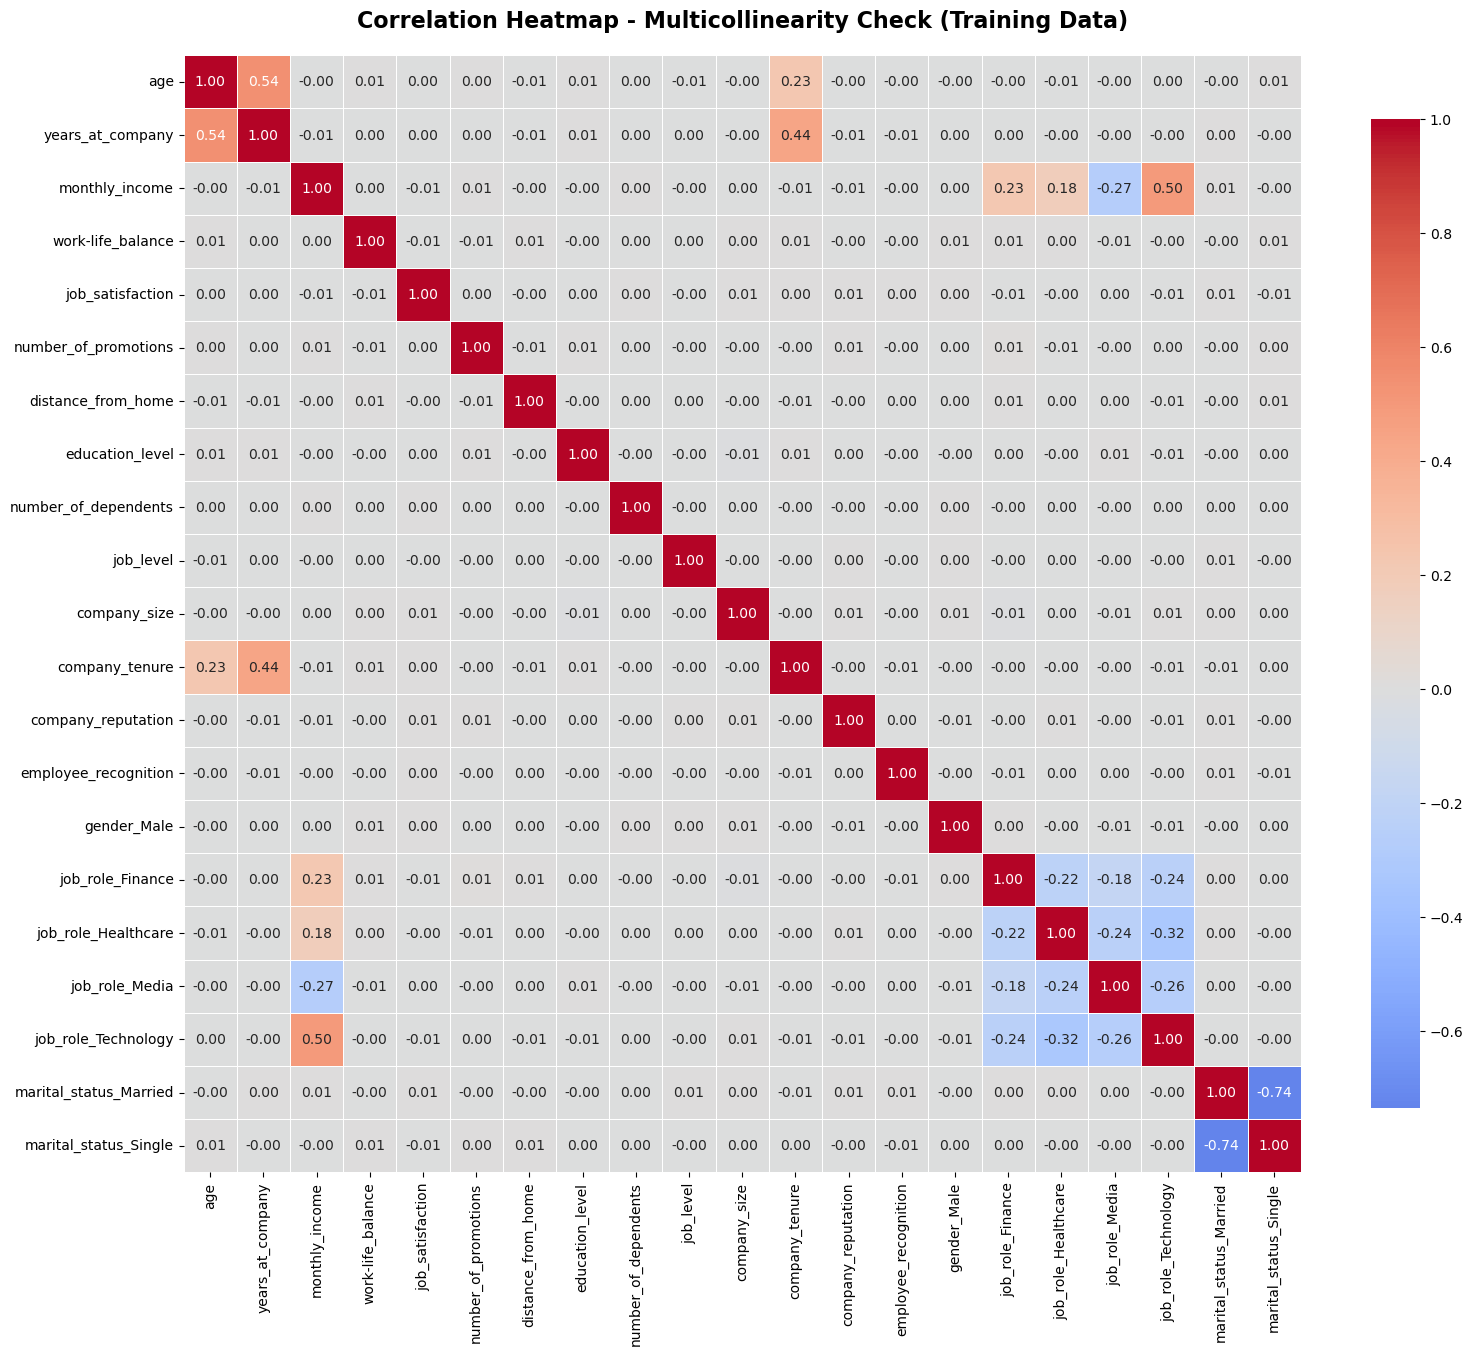


No highly correlated pairs found (|r| > 0.8)
No variables need to be removed.


In [11]:
import seaborn as sns

# Calculate correlation matrix on TRAINING data only
correlation_matrix = X_train_scaled.corr()

# Visualize correlation heatmap with data labels
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, 
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Multicollinearity Check (Training Data)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find highly correlated variable pairs
high_corr_threshold = 0.8
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print(f"\nFound {len(high_corr_pairs)} highly correlated pairs (|r| > {high_corr_threshold}):")
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values(
        'Correlation', ascending=False, key=abs
    )
    print(high_corr_df.to_string(index=False))
    
    # Identify variables to remove (keep first variable from each pair)
    variables_to_drop = set()
    for pair in high_corr_pairs:
        variables_to_drop.add(pair['Variable 2'])  # Drop the second variable
    
    print(f"\n{'='*60}")
    print(f"VARIABLES TO REMOVE DUE TO MULTICOLLINEARITY: {len(variables_to_drop)}")
    print(f"{'='*60}")
    for var in sorted(variables_to_drop):
        print(f"  - {var}")
    
    # Drop from BOTH scaled and unscaled datasets
    X_train_final = X_train_scaled.drop(columns=list(variables_to_drop))
    X_test_final = X_test_scaled.drop(columns=list(variables_to_drop))
    
    # Also drop from unscaled datasets for consistency
    X_train = X_train.drop(columns=list(variables_to_drop))
    X_test = X_test.drop(columns=list(variables_to_drop))
    
    print(f"\nScaled datasets after removing multicollinearity:")
    print(f"  X_train_final: {X_train_final.shape}")
    print(f"  X_test_final: {X_test_final.shape}")
    print(f"\nUnscaled datasets after removing multicollinearity:")
    print(f"  X_train: {X_train.shape}")
    print(f"  X_test: {X_test.shape}")
    
else:
    print(f"\nNo highly correlated pairs found (|r| > {high_corr_threshold})")
    print("No variables need to be removed.")
    X_train_final = X_train_scaled.copy()
    X_test_final = X_test_scaled.copy()
    # Unscaled datasets remain unchanged

### Final Dataset

In [12]:
print(f"\nFinal Training Set: {X_train_final.shape}")
print(f"Final Test Set: {X_test_final.shape}")
print(f"Total Features: {X_train_final.shape[1]}")
print(f"\nFeature names (same for both scaled and unscaled):")
for i, col in enumerate(X_train_final.columns, 1):
    print(f"  {i:2d}. {col}")

print("\nDatasets ready:")
print("  - X_train_final, y_train (scaled - for KNN, Logistic Regression, Naive Bayes)")
print("  - X_test_final, y_test (scaled - for KNN, Logistic Regression, Naive Bayes)")
print("  - X_train, y_train (unscaled - for Random Forest, CART)")
print("  - X_test, y_test (unscaled - for Random Forest, CART)")


Final Training Set: (47678, 21)
Final Test Set: (11920, 21)
Total Features: 21

Feature names (same for both scaled and unscaled):
   1. age
   2. years_at_company
   3. monthly_income
   4. work-life_balance
   5. job_satisfaction
   6. number_of_promotions
   7. distance_from_home
   8. education_level
   9. number_of_dependents
  10. job_level
  11. company_size
  12. company_tenure
  13. company_reputation
  14. employee_recognition
  15. gender_Male
  16. job_role_Finance
  17. job_role_Healthcare
  18. job_role_Media
  19. job_role_Technology
  20. marital_status_Married
  21. marital_status_Single

Datasets ready:
  - X_train_final, y_train (scaled - for KNN, Logistic Regression, Naive Bayes)
  - X_test_final, y_test (scaled - for KNN, Logistic Regression, Naive Bayes)
  - X_train, y_train (unscaled - for Random Forest, CART)
  - X_test, y_test (unscaled - for Random Forest, CART)


Important Information
- Removal of multicollinear variables applied to all datasets
- Both scaled and unscaled datasets now have the same features.
- All datasets contain 21 features.

Notes:
- Naive Bayes (GaussianNB), KNN, and Logistic Regression works with scaled data
- Random Forest and CART work better with unscaled data


## **Variable Selection**

### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

print("\nVerifying preprocessed datasets...")
print(f"✓ X_train (unscaled): {X_train.shape}")
print(f"✓ X_test (unscaled): {X_test.shape}")
print(f"✓ X_train_final (scaled): {X_train_final.shape}")
print(f"✓ X_test_final (scaled): {X_test_final.shape}")
print(f"✓ y_train: {y_train.shape}")
print(f"✓ y_test: {y_test.shape}")

print(f"\nTarget distribution (y_train):")
print(y_train.value_counts())
print(f"Attrition rate: {y_train.mean():.2%}")


Verifying preprocessed datasets...
✓ X_train (unscaled): (47678, 21)
✓ X_test (unscaled): (11920, 21)
✓ X_train_final (scaled): (47678, 21)
✓ X_test_final (scaled): (11920, 21)
✓ y_train: (47678,)
✓ y_test: (11920,)

Target distribution (y_train):
attrition
0    25008
1    22670
Name: count, dtype: int64
Attrition rate: 47.55%


### Train Random Forest

In [14]:
# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,       # For reproducibility
    max_depth=10,          # Limit tree depth to prevent overfitting
    min_samples_split=20,  # Minimum samples to split a node
    n_jobs=-1              # Use all CPU cores
)

# Train on unscaled data (Random Forest doesn't need scaling)
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)

print(f"Random Forest trained successfully")
print(f"  Number of trees: {rf_model.n_estimators}")
print(f"  Number of features: {X_train.shape[1]}")
print(f"  Training samples: {X_train.shape[0]}")

Training Random Forest model...
Random Forest trained successfully
  Number of trees: 100
  Number of features: 21
  Training samples: 47678


### Extract Feature Importance

In [15]:
# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Reset index for cleaner display
importance_df = importance_df.reset_index(drop=True)

# Calculate cumulative importance
importance_df['Cumulative_Importance'] = importance_df['Importance'].cumsum()

print("\nFeature Importance Rankings:")
print(importance_df.to_string(index=False))


Feature Importance Rankings:
               Feature  Importance  Cumulative_Importance
             job_level    0.272993               0.272993
 marital_status_Single    0.185388               0.458381
     work-life_balance    0.111451               0.569832
marital_status_Married    0.075728               0.645560
    distance_from_home    0.048979               0.694539
  number_of_promotions    0.045687               0.740226
    company_reputation    0.036879               0.777106
  number_of_dependents    0.034942               0.812048
       education_level    0.032346               0.844394
      years_at_company    0.029390               0.873784
           gender_Male    0.026112               0.899897
        monthly_income    0.024340               0.924237
                   age    0.022834               0.947071
        company_tenure    0.022360               0.969431
      job_satisfaction    0.011416               0.980847
  employee_recognition    0.006109        

### Visualize Feature Importance

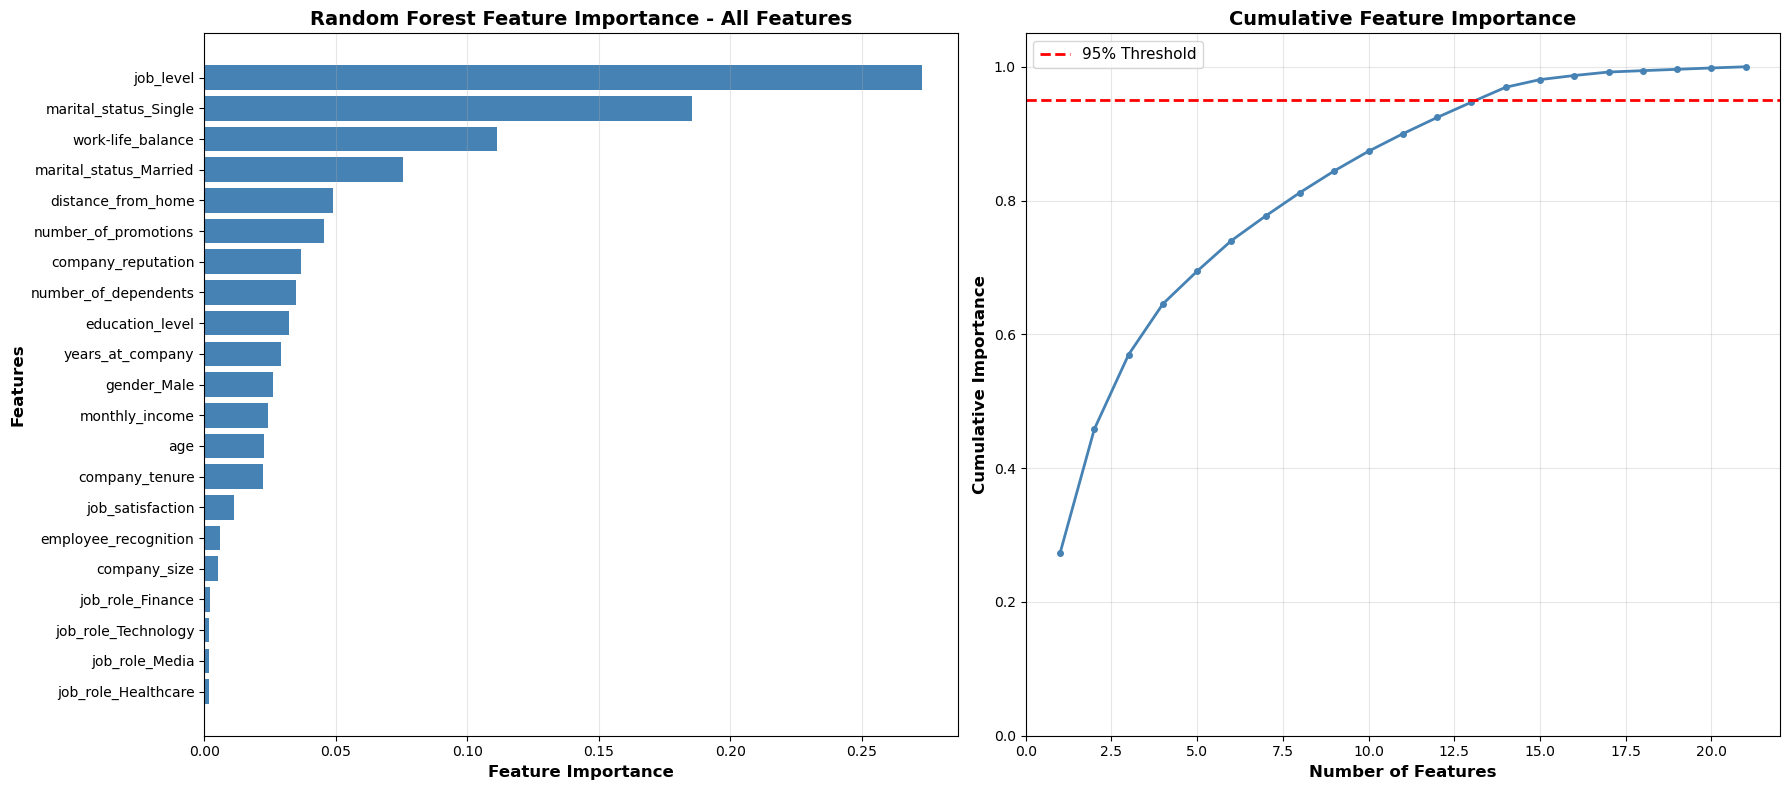

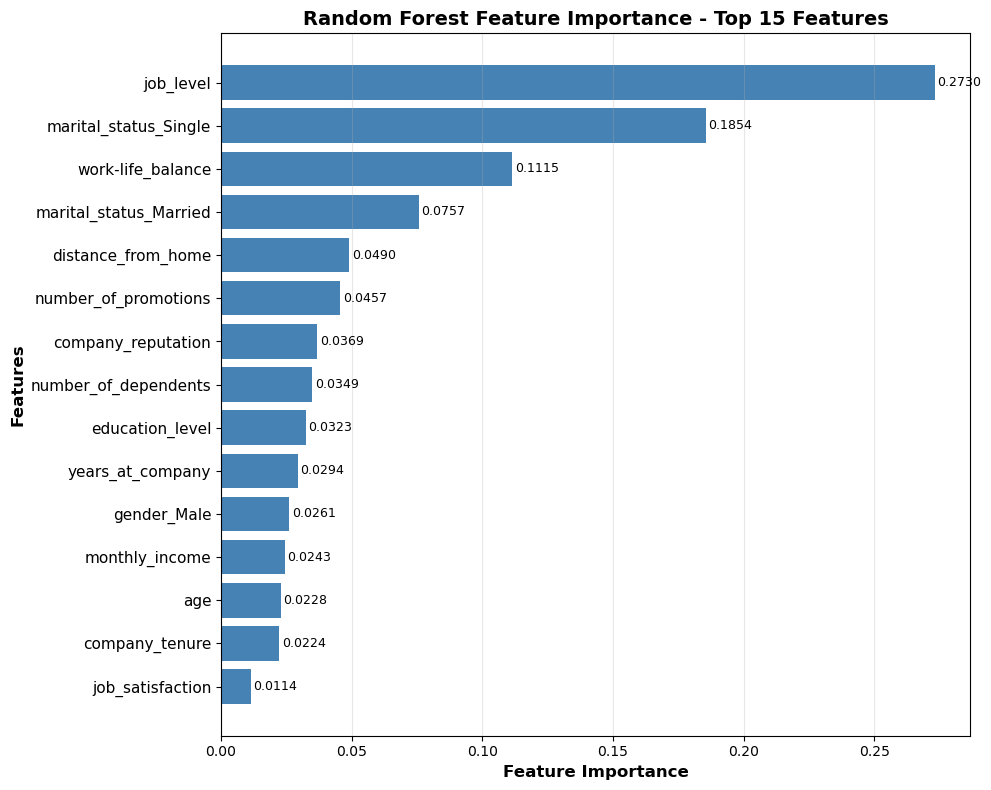

In [16]:
# Plot 1: All features with cumulative importance
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Left plot: Bar chart of all features
axes[0].barh(range(len(importance_df)), importance_df['Importance'], color='steelblue')
axes[0].set_yticks(range(len(importance_df)))
axes[0].set_yticklabels(importance_df['Feature'], fontsize=10)
axes[0].set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Features', fontsize=12, fontweight='bold')
axes[0].set_title('Random Forest Feature Importance - All Features', 
                   fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Right plot: Cumulative importance
axes[1].plot(range(1, len(importance_df) + 1), 
             importance_df['Cumulative_Importance'], 
             marker='o', linewidth=2, markersize=4, color='steelblue')
axes[1].axhline(y=0.95, color='red', linestyle='--', linewidth=2, 
                label='95% Threshold')
axes[1].set_xlabel('Number of Features', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Importance', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=11)
axes[1].set_ylim([0, 1.05])

plt.tight_layout()
plt.show()

# Plot 2: Top 15 features only (cleaner view)
top_n_display = min(15, len(importance_df))
top_features_display = importance_df.head(top_n_display)

plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(top_features_display)), 
                top_features_display['Importance'], 
                color='steelblue')
plt.yticks(range(len(top_features_display)), 
           top_features_display['Feature'], fontsize=11)
plt.xlabel('Feature Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title(f'Random Forest Feature Importance - Top {top_n_display} Features', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', 
             ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### Select Top Features

In [17]:
# Method 1: Select top N features by rank
top_n_features = 10  # Change this number based on your needs

selected_features_method1 = importance_df.head(top_n_features)['Feature'].tolist()

print(f"\nMethod 1: Top {top_n_features} Features by Rank")
print("=" * 60)
for i, feature in enumerate(selected_features_method1, 1):
    importance = importance_df[importance_df['Feature'] == feature]['Importance'].values[0]
    print(f"  {i:2d}. {feature:35s} Importance: {importance:.4f}")

# Method 2: Select features above importance threshold
importance_threshold = 0.03  # Adjust based on your data

selected_features_method2 = importance_df[
    importance_df['Importance'] >= importance_threshold
]['Feature'].tolist()

print(f"\nMethod 2: Features with Importance >= {importance_threshold}")
print("=" * 60)
print(f"Number of features selected: {len(selected_features_method2)}")
for i, feature in enumerate(selected_features_method2, 1):
    importance = importance_df[importance_df['Feature'] == feature]['Importance'].values[0]
    print(f"  {i:2d}. {feature:35s} Importance: {importance:.4f}")

# Method 3: Cumulative importance (features explaining 95% of total)
cumulative_threshold = 0.95

selected_features_method3 = importance_df[
    importance_df['Cumulative_Importance'] <= cumulative_threshold
]['Feature'].tolist()

print(f"\nMethod 3: Features Explaining {cumulative_threshold*100}% of Total Importance")
print("=" * 60)
print(f"Number of features selected: {len(selected_features_method3)}")
for i, feature in enumerate(selected_features_method3, 1):
    row = importance_df[importance_df['Feature'] == feature].iloc[0]
    print(f"  {i:2d}. {feature:35s} Importance: {row['Importance']:.4f}, Cumulative: {row['Cumulative_Importance']:.4f}")




Method 1: Top 10 Features by Rank
   1. job_level                           Importance: 0.2730
   2. marital_status_Single               Importance: 0.1854
   3. work-life_balance                   Importance: 0.1115
   4. marital_status_Married              Importance: 0.0757
   5. distance_from_home                  Importance: 0.0490
   6. number_of_promotions                Importance: 0.0457
   7. company_reputation                  Importance: 0.0369
   8. number_of_dependents                Importance: 0.0349
   9. education_level                     Importance: 0.0323
  10. years_at_company                    Importance: 0.0294

Method 2: Features with Importance >= 0.03
Number of features selected: 9
   1. job_level                           Importance: 0.2730
   2. marital_status_Single               Importance: 0.1854
   3. work-life_balance                   Importance: 0.1115
   4. marital_status_Married              Importance: 0.0757
   5. distance_from_home            

### Create Filtered Datasets

In [18]:
# Choose which method to use (default: Method 1 - Top N features)
# You can change this to selected_features_method2 or selected_features_method3
selected_features = selected_features_method1

print(f"\nUsing Method 1: Top {top_n_features} features")
print(f"Selected features: {selected_features}")

# Create filtered datasets for tree-based models (unscaled)
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

# Create filtered datasets for distance/linear models (scaled)
X_train_final_selected = X_train_final[selected_features].copy()
X_test_final_selected = X_test_final[selected_features].copy()

print(f"\nFiltered Dataset Shapes:")
print(f"  Original features: {X_train.shape[1]}")
print(f"  Selected features: {len(selected_features)}")
print(f"  Reduction: {X_train.shape[1] - len(selected_features)} features removed")
print(f"\n  X_train_selected (unscaled): {X_train_selected.shape}")
print(f"  X_test_selected (unscaled): {X_test_selected.shape}")
print(f"  X_train_final_selected (scaled): {X_train_final_selected.shape}")
print(f"  X_test_final_selected (scaled): {X_test_final_selected.shape}")


Using Method 1: Top 10 features
Selected features: ['job_level', 'marital_status_Single', 'work-life_balance', 'marital_status_Married', 'distance_from_home', 'number_of_promotions', 'company_reputation', 'number_of_dependents', 'education_level', 'years_at_company']

Filtered Dataset Shapes:
  Original features: 21
  Selected features: 10
  Reduction: 11 features removed

  X_train_selected (unscaled): (47678, 10)
  X_test_selected (unscaled): (11920, 10)
  X_train_final_selected (scaled): (47678, 10)
  X_test_final_selected (scaled): (11920, 10)


### Summary and Recommendations

In [19]:
print("\n📊 DATASETS AVAILABLE FOR ALL 5 MODELS:")
print("\n1. For Tree-Based Models (Random Forest, CART):")
print(f"   X_train_selected, y_train")
print(f"   X_test_selected, y_test")
print(f"   Features: {len(selected_features)} (unscaled)")

print("\n2. For Distance/Linear Models (KNN, Logistic Regression, Naive Bayes):")
print(f"   X_train_final_selected, y_train")
print(f"   X_test_final_selected, y_test")
print(f"   Features: {len(selected_features)} (scaled)")

print("\n" + "=" * 60)
print("BENEFITS OF FEATURE SELECTION")
print("=" * 60)
print(f"✓ Reduced features from {X_train.shape[1]} to {len(selected_features)}")
print("✓ Improved model training speed")
print("✓ Reduced risk of overfitting")
print("✓ Focus on most predictive features")
print("✓ Better model interpretability")


📊 DATASETS AVAILABLE FOR ALL 5 MODELS:

1. For Tree-Based Models (Random Forest, CART):
   X_train_selected, y_train
   X_test_selected, y_test
   Features: 10 (unscaled)

2. For Distance/Linear Models (KNN, Logistic Regression, Naive Bayes):
   X_train_final_selected, y_train
   X_test_final_selected, y_test
   Features: 10 (scaled)

BENEFITS OF FEATURE SELECTION
✓ Reduced features from 21 to 10
✓ Improved model training speed
✓ Reduced risk of overfitting
✓ Focus on most predictive features
✓ Better model interpretability


## **Model Training and Evaluation**

### 1. K-Nearest Neighbors (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

print("1. K-NEAREST NEIGHBORS (KNN)")

# Train KNN model (uses scaled data)
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_final_selected, y_train)
knn_train_time = time.time() - start_time

# Make predictions
y_pred_knn = knn_model.predict(X_test_final_selected)
y_pred_proba_knn = knn_model.predict_proba(X_test_final_selected)[:, 1]

# Calculate metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"\nTraining Time: {knn_train_time:.4f} seconds")
print(f"Test Accuracy: {knn_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['Stayed', 'Left']))

# Confusion Matrix
knn_cm = confusion_matrix(y_test, y_pred_knn)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                Stayed  Left")
print(f"Actual Stayed   {knn_cm[0,0]:6d}  {knn_cm[0,1]:5d}")
print(f"       Left     {knn_cm[1,0]:6d}  {knn_cm[1,1]:5d}")

1. K-NEAREST NEIGHBORS (KNN)

Training Time: 0.0866 seconds
Test Accuracy: 0.6800

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.70      0.69      0.69      6252
        Left       0.66      0.66      0.66      5668

    accuracy                           0.68     11920
   macro avg       0.68      0.68      0.68     11920
weighted avg       0.68      0.68      0.68     11920


Confusion Matrix:
                 Predicted
                Stayed  Left
Actual Stayed     4338   1914
       Left       1900   3768


### 2. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

print("2. LOGISTIC REGRESSION")

# Train Logistic Regression model (uses scaled data)
start_time = time.time()
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_final_selected, y_train)
log_reg_train_time = time.time() - start_time

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test_final_selected)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_final_selected)[:, 1]

# Calculate metrics
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

print(f"\nTraining Time: {log_reg_train_time:.4f} seconds")
print(f"Test Accuracy: {log_reg_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Stayed', 'Left']))

# Confusion Matrix
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                Stayed  Left")
print(f"Actual Stayed   {log_reg_cm[0,0]:6d}  {log_reg_cm[0,1]:5d}")
print(f"       Left     {log_reg_cm[1,0]:6d}  {log_reg_cm[1,1]:5d}")

2. LOGISTIC REGRESSION

Training Time: 0.0577 seconds
Test Accuracy: 0.7112

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.72      0.74      0.73      6252
        Left       0.70      0.68      0.69      5668

    accuracy                           0.71     11920
   macro avg       0.71      0.71      0.71     11920
weighted avg       0.71      0.71      0.71     11920


Confusion Matrix:
                 Predicted
                Stayed  Left
Actual Stayed     4608   1644
       Left       1798   3870


### 3. Classification and Regression Trees (CART)

In [22]:
from sklearn.tree import DecisionTreeClassifier

print("3. CLASSIFICATION AND REGRESSION TREES (CART)")

# Train CART model (uses unscaled data)
start_time = time.time()
cart_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10
)
cart_model.fit(X_train_selected, y_train)
cart_train_time = time.time() - start_time

# Make predictions
y_pred_cart = cart_model.predict(X_test_selected)
y_pred_proba_cart = cart_model.predict_proba(X_test_selected)[:, 1]

# Calculate metrics
cart_accuracy = accuracy_score(y_test, y_pred_cart)

print(f"\nTraining Time: {cart_train_time:.4f} seconds")
print(f"Test Accuracy: {cart_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_cart, target_names=['Stayed', 'Left']))

# Confusion Matrix
cart_cm = confusion_matrix(y_test, y_pred_cart)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                Stayed  Left")
print(f"Actual Stayed   {cart_cm[0,0]:6d}  {cart_cm[0,1]:5d}")
print(f"       Left     {cart_cm[1,0]:6d}  {cart_cm[1,1]:5d}")

3. CLASSIFICATION AND REGRESSION TREES (CART)

Training Time: 0.0931 seconds
Test Accuracy: 0.7110

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.73      0.72      0.72      6252
        Left       0.69      0.70      0.70      5668

    accuracy                           0.71     11920
   macro avg       0.71      0.71      0.71     11920
weighted avg       0.71      0.71      0.71     11920


Confusion Matrix:
                 Predicted
                Stayed  Left
Actual Stayed     4502   1750
       Left       1695   3973


### 4. Random Forest

In [23]:
print("4. RANDOM FOREST")

# Train Random Forest model (uses unscaled data)
start_time = time.time()
rf_final_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    n_jobs=-1
)
rf_final_model.fit(X_train_selected, y_train)
rf_train_time = time.time() - start_time

# Make predictions
y_pred_rf = rf_final_model.predict(X_test_selected)
y_pred_proba_rf = rf_final_model.predict_proba(X_test_selected)[:, 1]

# Calculate metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"\nTraining Time: {rf_train_time:.4f} seconds")
print(f"Test Accuracy: {rf_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Stayed', 'Left']))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                Stayed  Left")
print(f"Actual Stayed   {rf_cm[0,0]:6d}  {rf_cm[0,1]:5d}")
print(f"       Left     {rf_cm[1,0]:6d}  {rf_cm[1,1]:5d}")

4. RANDOM FOREST

Training Time: 1.2876 seconds
Test Accuracy: 0.7242

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.74      0.74      0.74      6252
        Left       0.71      0.71      0.71      5668

    accuracy                           0.72     11920
   macro avg       0.72      0.72      0.72     11920
weighted avg       0.72      0.72      0.72     11920


Confusion Matrix:
                 Predicted
                Stayed  Left
Actual Stayed     4608   1644
       Left       1644   4024


### 5. Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

print("5. NAIVE BAYES (GAUSSIAN)")

# Train Naive Bayes model (uses scaled data)
start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train_final_selected, y_train)
nb_train_time = time.time() - start_time

# Make predictions
y_pred_nb = nb_model.predict(X_test_final_selected)
y_pred_proba_nb = nb_model.predict_proba(X_test_final_selected)[:, 1]

# Calculate metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)

print(f"\nTraining Time: {nb_train_time:.4f} seconds")
print(f"Test Accuracy: {nb_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['Stayed', 'Left']))

# Confusion Matrix
nb_cm = confusion_matrix(y_test, y_pred_nb)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                Stayed  Left")
print(f"Actual Stayed   {nb_cm[0,0]:6d}  {nb_cm[0,1]:5d}")
print(f"       Left     {nb_cm[1,0]:6d}  {nb_cm[1,1]:5d}")

5. NAIVE BAYES (GAUSSIAN)

Training Time: 0.0146 seconds
Test Accuracy: 0.7013

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.70      0.75      0.73      6252
        Left       0.70      0.65      0.67      5668

    accuracy                           0.70     11920
   macro avg       0.70      0.70      0.70     11920
weighted avg       0.70      0.70      0.70     11920


Confusion Matrix:
                 Predicted
                Stayed  Left
Actual Stayed     4696   1556
       Left       2004   3664


## **Model Comparison**

### Calculate Additional Metrics

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Store all results
models_results = {
    'KNN': {
        'predictions': y_pred_knn,
        'probabilities': y_pred_proba_knn,
        'accuracy': knn_accuracy,
        'train_time': knn_train_time,
        'confusion_matrix': knn_cm
    },
    'Logistic Regression': {
        'predictions': y_pred_log_reg,
        'probabilities': y_pred_proba_log_reg,
        'accuracy': log_reg_accuracy,
        'train_time': log_reg_train_time,
        'confusion_matrix': log_reg_cm
    },
    'CART': {
        'predictions': y_pred_cart,
        'probabilities': y_pred_proba_cart,
        'accuracy': cart_accuracy,
        'train_time': cart_train_time,
        'confusion_matrix': cart_cm
    },
    'Random Forest': {
        'predictions': y_pred_rf,
        'probabilities': y_pred_proba_rf,
        'accuracy': rf_accuracy,
        'train_time': rf_train_time,
        'confusion_matrix': rf_cm
    },
    'Naive Bayes': {
        'predictions': y_pred_nb,
        'probabilities': y_pred_proba_nb,
        'accuracy': nb_accuracy,
        'train_time': nb_train_time,
        'confusion_matrix': nb_cm
    }
}

# Calculate comprehensive metrics for all models
comparison_data = []

for model_name, results in models_results.items():
    y_pred = results['predictions']
    y_proba = results['probabilities']
    
    comparison_data.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'Training Time (s)': results['train_time']
    })

# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("MODEL COMPARISON - PERFORMANCE METRICS")
print("\n")
print(comparison_df.to_string(index=False))

MODEL COMPARISON - PERFORMANCE METRICS


              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Training Time (s)
      Random Forest  0.724161   0.709951 0.709951  0.709951 0.808598           1.287580
Logistic Regression  0.711242   0.701850 0.682781  0.692184 0.791061           0.057730
               CART  0.710990   0.694216 0.700953  0.697568 0.791689           0.093081
        Naive Bayes  0.701342   0.701916 0.646436  0.673035 0.783900           0.014558
                KNN  0.680034   0.663147 0.664785  0.663965 0.740755           0.086574


### Visualize Model Comparison

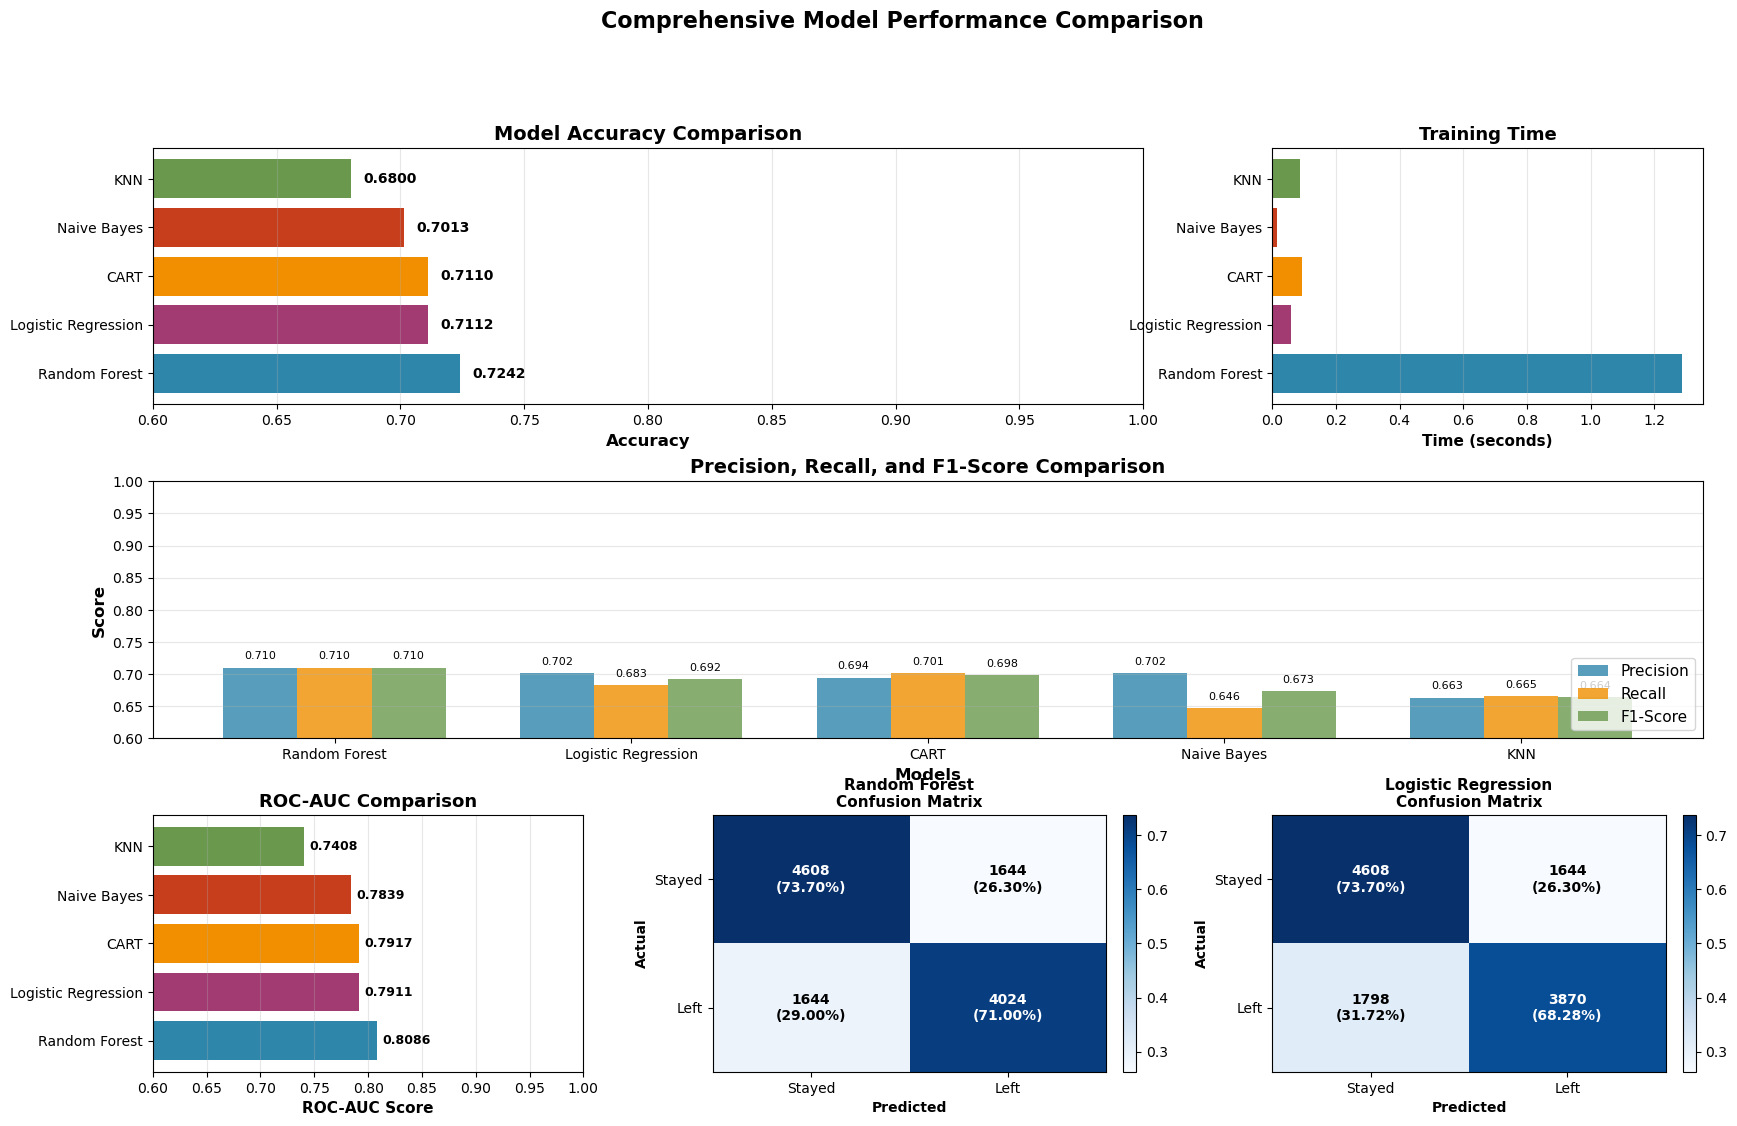

In [26]:
# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Accuracy Comparison (Bar Chart)
ax1 = fig.add_subplot(gs[0, :2])
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
bars = ax1.barh(comparison_df['Model'], comparison_df['Accuracy'], color=colors)
ax1.set_xlabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlim([0.6, 1.0])
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=10, fontweight='bold')

# 2. Training Time Comparison
ax2 = fig.add_subplot(gs[0, 2])
ax2.barh(comparison_df['Model'], comparison_df['Training Time (s)'], color=colors)
ax2.set_xlabel('Time (seconds)', fontsize=11, fontweight='bold')
ax2.set_title('Training Time', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 3. Precision, Recall, F1-Score Comparison
ax3 = fig.add_subplot(gs[1, :])
x_pos = np.arange(len(comparison_df))
width = 0.25

bars1 = ax3.bar(x_pos - width, comparison_df['Precision'], width, 
                label='Precision', color='#2E86AB', alpha=0.8)
bars2 = ax3.bar(x_pos, comparison_df['Recall'], width, 
                label='Recall', color='#F18F01', alpha=0.8)
bars3 = ax3.bar(x_pos + width, comparison_df['F1-Score'], width, 
                label='F1-Score', color='#6A994E', alpha=0.8)

ax3.set_xlabel('Models', fontsize=12, fontweight='bold')
ax3.set_ylabel('Score', fontsize=12, fontweight='bold')
ax3.set_title('Precision, Recall, and F1-Score Comparison', fontsize=14, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(comparison_df['Model'], rotation=0)
ax3.legend(loc='lower right', fontsize=11)
ax3.set_ylim([0.6, 1.0])
ax3.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 4. ROC-AUC Scores
ax4 = fig.add_subplot(gs[2, 0])
ax4.barh(comparison_df['Model'], comparison_df['ROC-AUC'], color=colors)
ax4.set_xlabel('ROC-AUC Score', fontsize=11, fontweight='bold')
ax4.set_title('ROC-AUC Comparison', fontsize=13, fontweight='bold')
ax4.set_xlim([0.6, 1.0])
ax4.grid(axis='x', alpha=0.3)

# Add value labels
for i, (model, score) in enumerate(zip(comparison_df['Model'], comparison_df['ROC-AUC'])):
    ax4.text(score + 0.005, i, f'{score:.4f}', 
             ha='left', va='center', fontsize=9, fontweight='bold')

# 5. Confusion Matrix Heatmaps (showing 2 best models)
best_models = comparison_df.head(2)['Model'].tolist()

for idx, model_name in enumerate(best_models):
    ax = fig.add_subplot(gs[2, idx + 1])
    cm = models_results[model_name]['confusion_matrix']
    
    # Normalize confusion matrix for better visualization
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    im = ax.imshow(cm_normalized, cmap='Blues', aspect='auto')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Stayed', 'Left'])
    ax.set_yticklabels(['Stayed', 'Left'])
    ax.set_xlabel('Predicted', fontsize=10, fontweight='bold')
    ax.set_ylabel('Actual', fontsize=10, fontweight='bold')
    ax.set_title(f'{model_name}\nConfusion Matrix', fontsize=11, fontweight='bold')
    
    # Add text annotations
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, f'{cm[i, j]}\n({cm_normalized[i, j]:.2%})',
                          ha="center", va="center", color="white" if cm_normalized[i, j] > 0.5 else "black",
                          fontsize=10, fontweight='bold')
    
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle('Comprehensive Model Performance Comparison', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

### ROC Curve Comparison

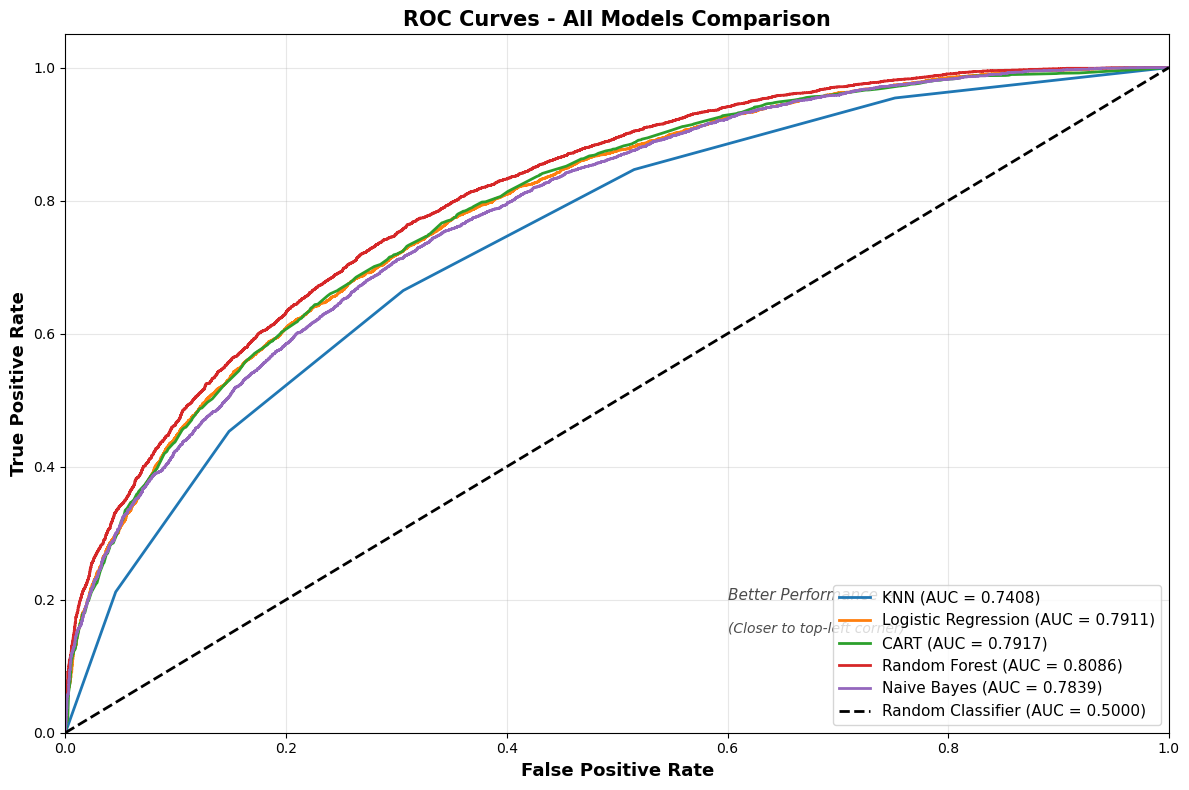

In [27]:
plt.figure(figsize=(12, 8))

# Plot ROC curve for each model
for model_name, results in models_results.items():
    y_proba = results['probabilities']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    plt.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC = {auc_score:.4f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5000)')

plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('ROC Curves - All Models Comparison', fontsize=15, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Add annotations
plt.text(0.6, 0.2, 'Better Performance →', fontsize=11, style='italic', alpha=0.7)
plt.text(0.6, 0.15, '(Closer to top-left corner)', fontsize=10, style='italic', alpha=0.7)

plt.tight_layout()
plt.show()

### Summary Statistics

In [28]:
print("MODEL RANKING SUMMARY")
# Rank by different metrics
metrics_to_rank = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for metric in metrics_to_rank:
    ranked = comparison_df.sort_values(metric, ascending=False)
    print(f"\n{metric} Ranking:")
    for idx, row in ranked.iterrows():
        print(f"  {idx+1}. {row['Model']:25s} - {row[metric]:.4f}")

# Best overall model (by accuracy)
best_model = comparison_df.iloc[0]
print("\n")
print("BEST PERFORMING MODEL")
print(f"Model: {best_model['Model']}")
print(f"  • Accuracy:      {best_model['Accuracy']:.4f}")
print(f"  • Precision:     {best_model['Precision']:.4f}")
print(f"  • Recall:        {best_model['Recall']:.4f}")
print(f"  • F1-Score:      {best_model['F1-Score']:.4f}")
print(f"  • ROC-AUC:       {best_model['ROC-AUC']:.4f}")
print(f"  • Training Time: {best_model['Training Time (s)']:.4f} seconds")

MODEL RANKING SUMMARY

Accuracy Ranking:
  1. Random Forest             - 0.7242
  2. Logistic Regression       - 0.7112
  3. CART                      - 0.7110
  4. Naive Bayes               - 0.7013
  5. KNN                       - 0.6800

Precision Ranking:
  1. Random Forest             - 0.7100
  4. Naive Bayes               - 0.7019
  2. Logistic Regression       - 0.7018
  3. CART                      - 0.6942
  5. KNN                       - 0.6631

Recall Ranking:
  1. Random Forest             - 0.7100
  3. CART                      - 0.7010
  2. Logistic Regression       - 0.6828
  5. KNN                       - 0.6648
  4. Naive Bayes               - 0.6464

F1-Score Ranking:
  1. Random Forest             - 0.7100
  3. CART                      - 0.6976
  2. Logistic Regression       - 0.6922
  4. Naive Bayes               - 0.6730
  5. KNN                       - 0.6640

ROC-AUC Ranking:
  1. Random Forest             - 0.8086
  3. CART                      - 0.7917
  2. 

MODEL RECOMMENDATIONS
- Random Forest: Best overall performance, handles non-linear relationships well
- Logistic Regression: Fast training, good interpretability, solid performance
- KNN: Simple to implement, no training phase, good for small datasets
- CART: Highly interpretable, good for understanding decision rules
- Naive Bayes: Very fast, works well with high-dimensional data
